# Exploratory Data Analysis

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\Admin\Desktop\Stats Datasets\CocoaPrice.csv")

# Display the first few rows of the dataset
print(data.head())

         Date    Price
0  1994-10-01  1447.95
1  1994-11-01  1437.05
2  1994-12-01  1399.43
3  1995-01-01  1468.86
4  1995-02-01  1510.55


In [2]:
print(data.shape)

(354, 2)


In [3]:
description = data.describe(include='all')
print("Description of the dataset:")
print(description)


# Check for null values
null_values = data.isnull().sum()
print("\nNull values in the dataset:")
print(null_values)

# Check for duplicates
duplicates = data.duplicated().sum()
print("\nNumber of duplicates in the dataset:", duplicates)

# Check the shape of the dataset
shape = data.shape
print("\nShape of the dataset:", shape)

Description of the dataset:
              Date        Price
count          354   354.000000
unique         354          NaN
top     1994-10-01          NaN
freq             1          NaN
mean           NaN  1853.000311
std            NaN   623.238555
min            NaN   874.140000
25%            NaN  1396.147500
50%            NaN  1805.985000
75%            NaN  2168.545000
max            NaN  6510.160000

Null values in the dataset:
Date     0
Price    0
dtype: int64

Number of duplicates in the dataset: 0

Shape of the dataset: (354, 2)


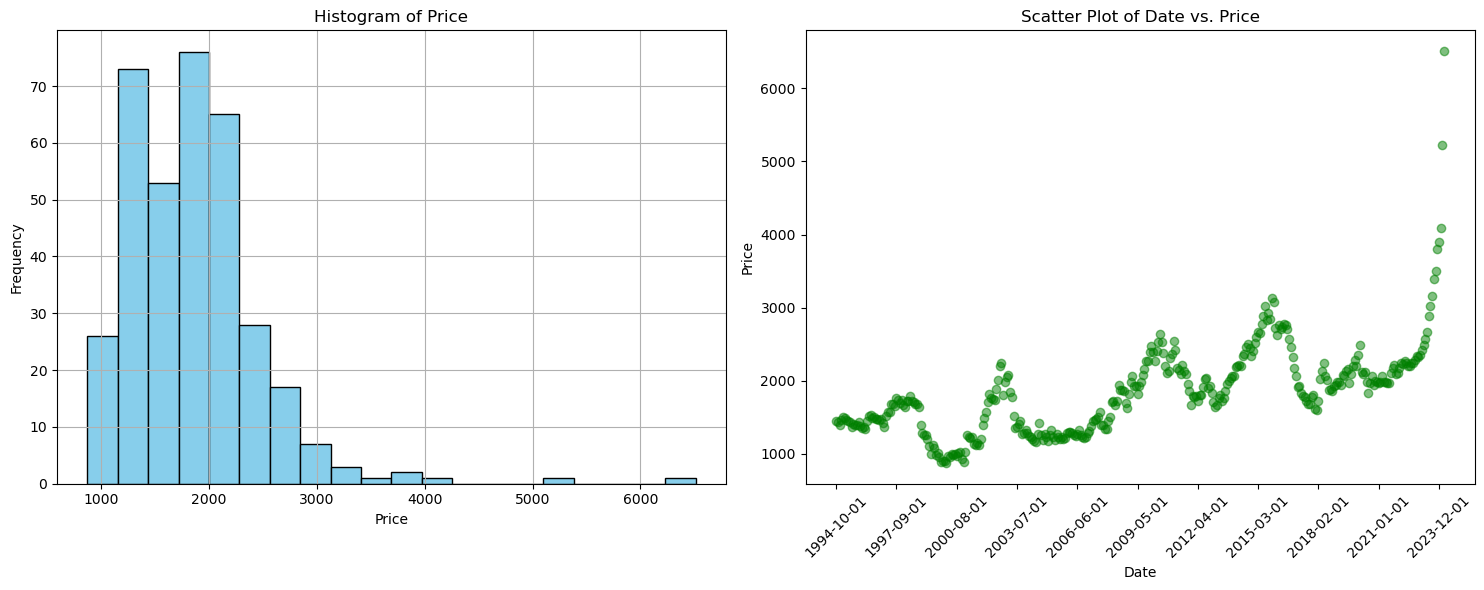

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing Date and Price columns

# Create subplots with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Univariate Analysis - Histogram of Price
axes[0].hist(data['Price'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Bivariate Analysis - Scatter plot of Date vs. Price
axes[1].scatter(data['Date'], data['Price'], color='green', alpha=0.5)
axes[1].set_title('Scatter Plot of Date vs. Price')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')

# Setting x-axis ticks to display only a few dates
# Assuming 'data' is sorted by Date
xticks = [data['Date'].iloc[i] for i in range(0, len(data['Date']), len(data['Date'])//10)] # Adjust 3 to set the frequency of displayed dates
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xticks, rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [5]:
import pandas as pd

# Load the dataset
# data = pd.read_csv("your_dataset.csv")

# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Compute correlation between Date and Price
correlation = data['Date'].corr(data['Price'])

print("Correlation between Date and Price:", correlation)


Correlation between Date and Price: 0.6700706699962298


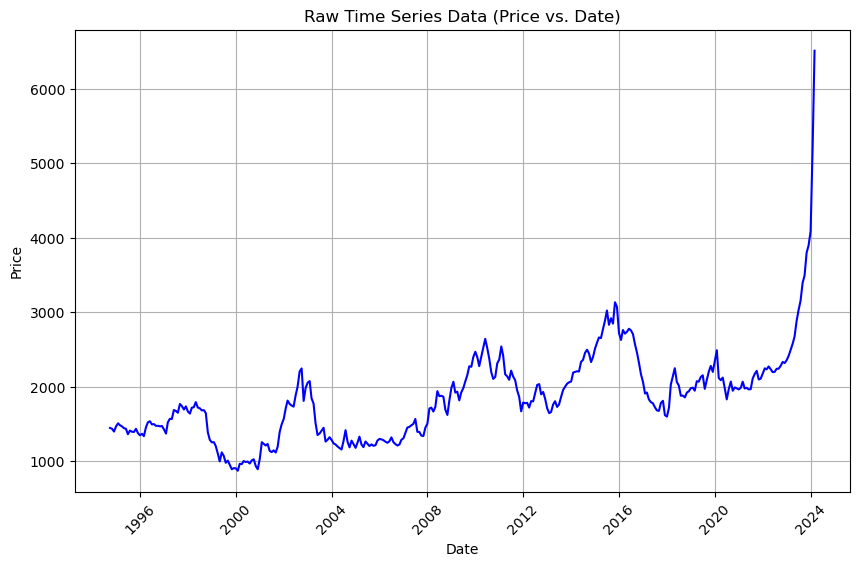

In [6]:
import matplotlib.pyplot as plt

# Visualize time series data using line plot
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], color='blue')
plt.title('Raw Time Series Data (Price vs. Date)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [7]:
# Summary statistics of Price
summary_stats = data['Price'].describe()
print("Summary Statistics of Price:")
print(summary_stats)


Summary Statistics of Price:
count     354.000000
mean     1853.000311
std       623.238555
min       874.140000
25%      1396.147500
50%      1805.985000
75%      2168.545000
max      6510.160000
Name: Price, dtype: float64


In [8]:
import pandas as pd


# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Display the first few rows of the updated dataset
print(data.head())


              Price
Date               
1994-10-01  1447.95
1994-11-01  1437.05
1994-12-01  1399.43
1995-01-01  1468.86
1995-02-01  1510.55


In [9]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(data['Price'])

# Extract test statistics and p-value
test_statistic = result[0]
p_value = result[1]

# Print test results
print('Dickey-Fuller Test Statistic:', test_statistic)
print('p-value:', p_value)

# Interpret the test results
if p_value <= 0.05:
    print("Reject the null hypothesis: The data is stationary")
else:
    print("Fail to reject the null hypothesis: The data is non-stationary")


Dickey-Fuller Test Statistic: 1.5287178514947255
p-value: 0.9976271539962082
Fail to reject the null hypothesis: The data is non-stationary


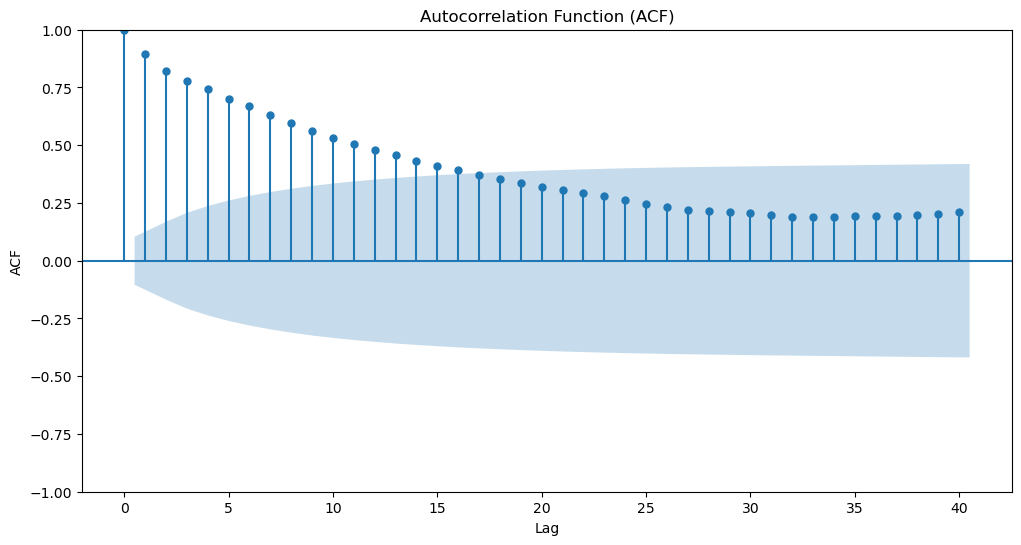

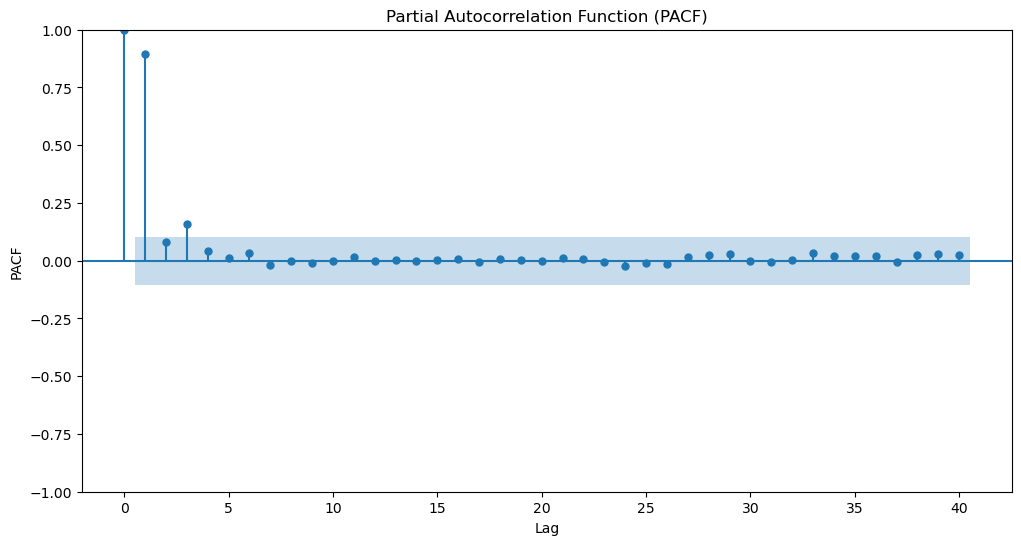

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(data['Price'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(data['Price'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()


# Differencing 

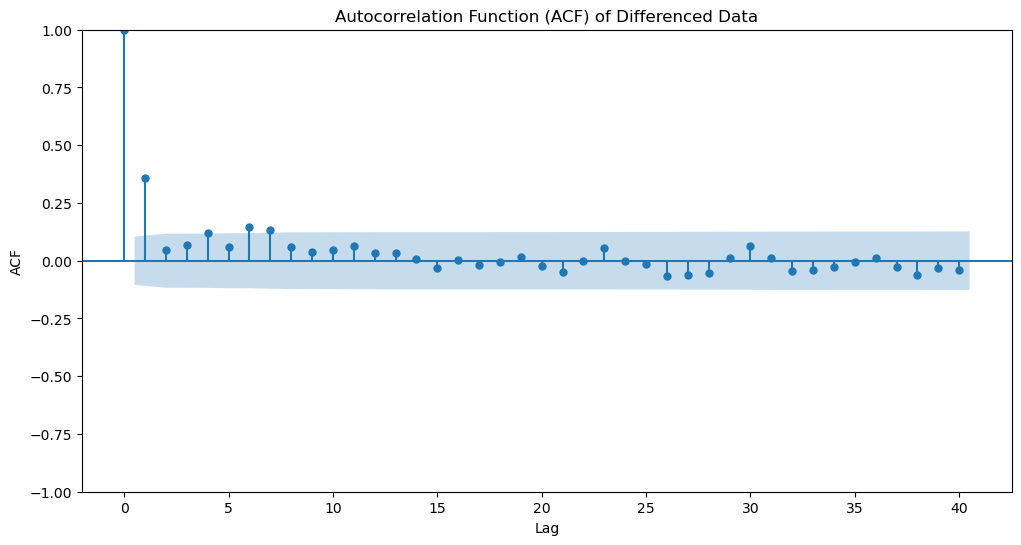

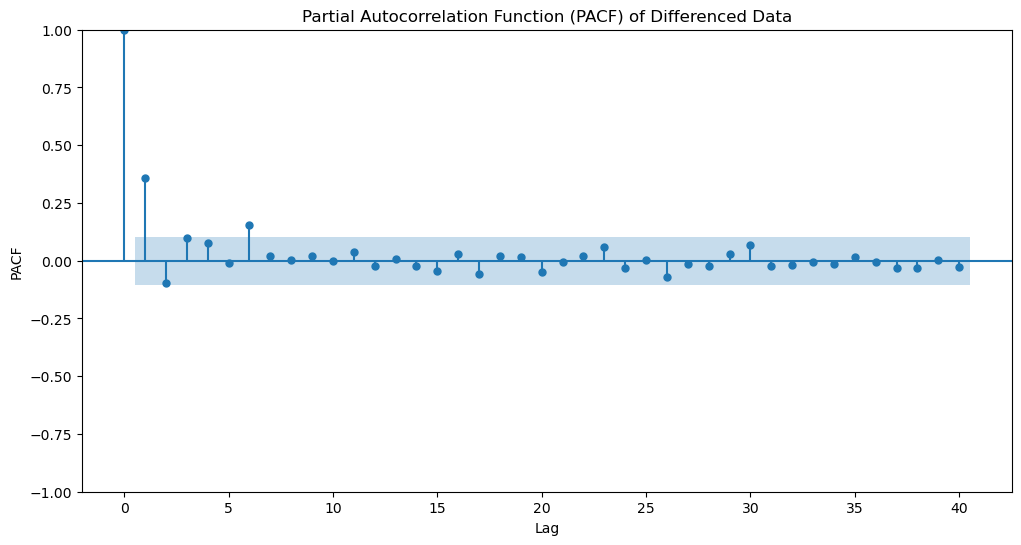

In [11]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Perform differencing
data_diff = data['Price'].diff().dropna()

# Plot ACF of differenced data
plt.figure(figsize=(12, 6))
plot_acf(data_diff, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of Differenced Data')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Plot PACF of differenced data
plt.figure(figsize=(12, 6))
plot_pacf(data_diff, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) of Differenced Data')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()


In [12]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test on differenced data
result_diff = adfuller(data_diff)

# Extract test statistics and p-value
test_statistic_diff = result_diff[0]
p_value_diff = result_diff[1]

# Print test results
print('Dickey-Fuller Test Statistic (Differenced Data):', test_statistic_diff)
print('p-value (Differenced Data):', p_value_diff)

# Interpret the test results
if p_value_diff <= 0.05:
    print("Reject the null hypothesis: The differenced data is stationary")
else:
    print("Fail to reject the null hypothesis: The differenced data is non-stationary")


Dickey-Fuller Test Statistic (Differenced Data): 0.07448145834557335
p-value (Differenced Data): 0.9642750135031485
Fail to reject the null hypothesis: The differenced data is non-stationary


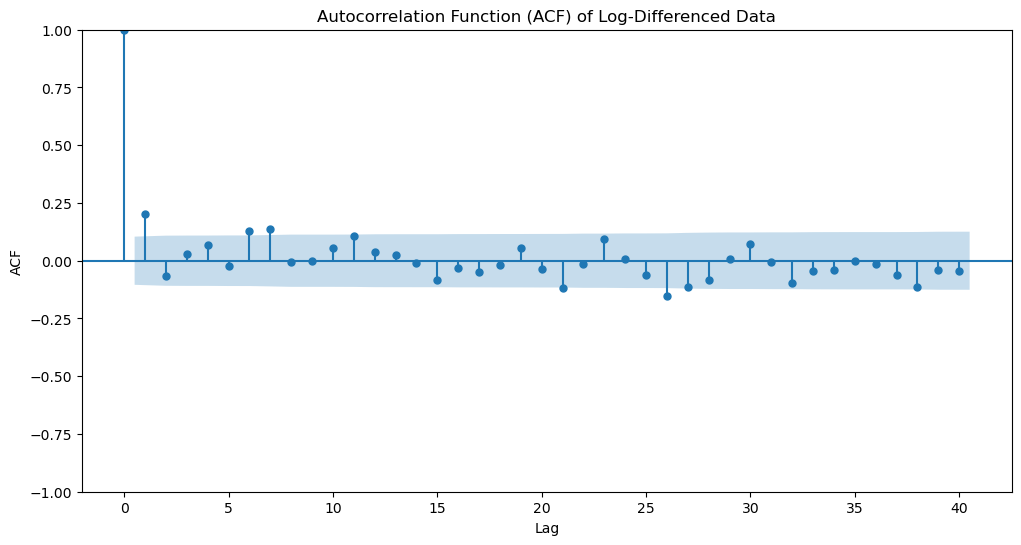

<Figure size 1200x600 with 0 Axes>

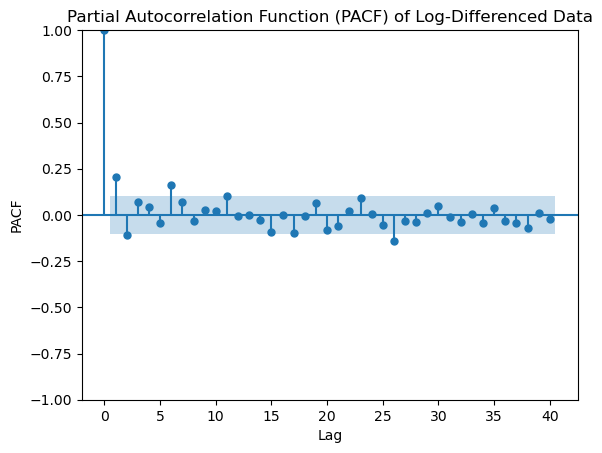

In [13]:
import numpy as np

# Perform log differencing
data_log_diff = np.log(data['Price']).diff().dropna()

# Plot ACF of log-differenced data
plt.figure(figsize=(12, 6))
plot_acf(data_log_diff, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of Log-Differenced Data')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Plot PACF of log-differenced data
plt.figure(figsize=(12, 6))
plot_pacf(data_log_diff, lags=40)  # Removed unnecessary import statement
plt.title('Partial Autocorrelation Function (PACF) of Log-Differenced Data')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()


In [14]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test on log-differenced data
result_log_diff = adfuller(data_log_diff)

# Extract test statistics and p-value
test_statistic_log_diff = result_log_diff[0]
p_value_log_diff = result_log_diff[1]

# Print test results
print('Dickey-Fuller Test Statistic (Log-Differenced Data):', test_statistic_log_diff)
print('p-value (Log-Differenced Data):', p_value_log_diff)

# Interpret the test results
if p_value_log_diff <= 0.05:
    print("Reject the null hypothesis: The log-differenced data is stationary")
else:
    print("Fail to reject the null hypothesis: The log-differenced data is non-stationary")


Dickey-Fuller Test Statistic (Log-Differenced Data): -4.470199156297323
p-value (Log-Differenced Data): 0.00022251308424014644
Reject the null hypothesis: The log-differenced data is stationary


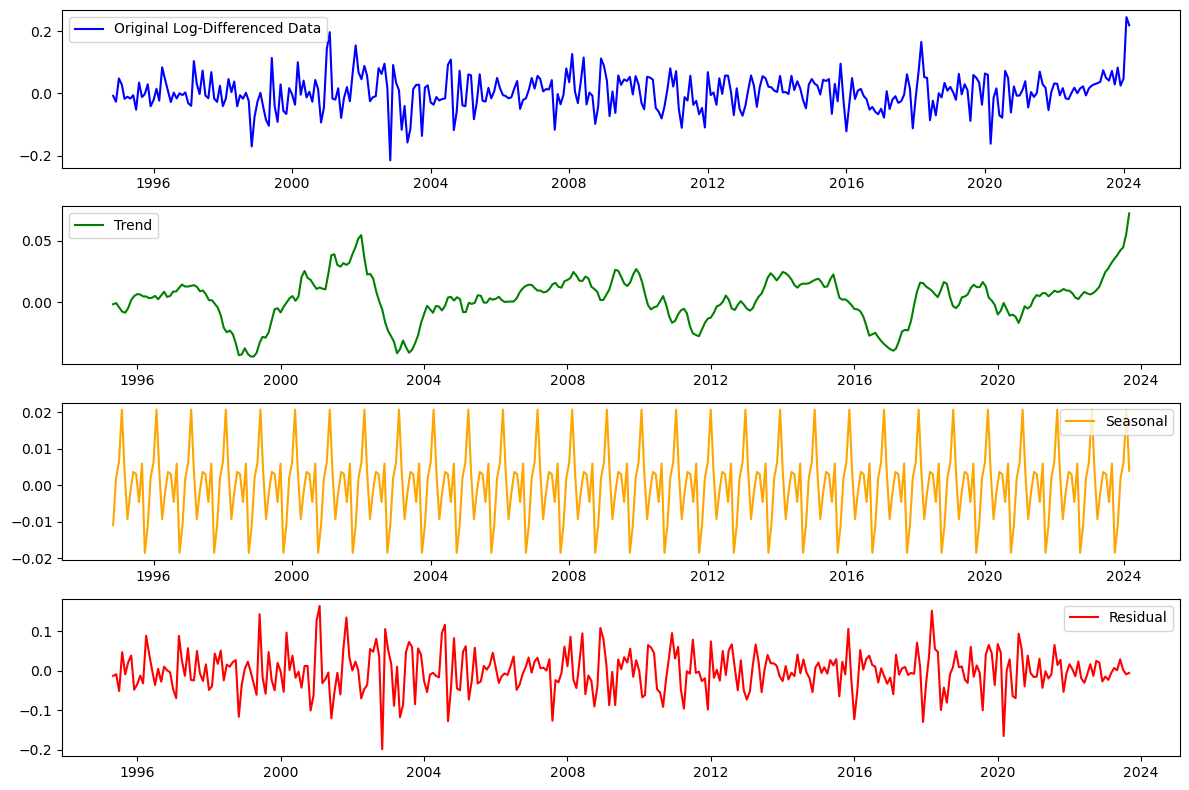

In [15]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on the log-differenced series
decomposition = seasonal_decompose(data_log_diff, model='additive', period=12)  # Assuming monthly seasonality (period=12)

# Plot the decomposition components
plt.figure(figsize=(12, 8))

# Original log-differenced data
plt.subplot(411)
plt.plot(data_log_diff, label='Original Log-Differenced Data', color='blue')
plt.legend()

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.legend()

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='orange')
plt.legend()

# Residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend()

plt.tight_layout()
plt.show()


## Split datasets

In [16]:
# Define the cutoff date
cutoff_date = '2023-09-30'

# Split the data into training and test sets
train_data = data_log_diff[data_log_diff.index <= cutoff_date]
test_data = data_log_diff[data_log_diff.index > cutoff_date]

# Print the number of observations in each set
print("Number of observations in training set:", len(train_data))
print("Number of observations in test set:", len(test_data))


Number of observations in training set: 347
Number of observations in test set: 6


## Models

Mean Model Metrics:
MAE: 0.10602530421737061
MSE: 0.019367576177399277
RMSE: 0.13916743935777245


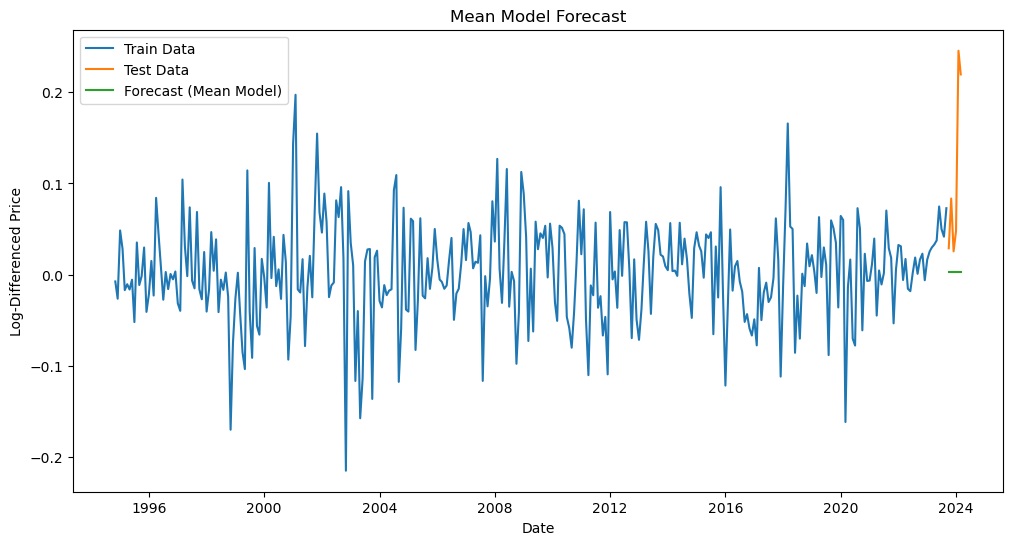

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Mean model
mean_value = train_data.mean()
forecast_mean = np.full(len(test_data), mean_value)

# Evaluation metrics
mae_mean = mean_absolute_error(test_data, forecast_mean)
mse_mean = mean_squared_error(test_data, forecast_mean)
rmse_mean = np.sqrt(mse_mean)

print("Mean Model Metrics:")
print("MAE:", mae_mean)
print("MSE:", mse_mean)
print("RMSE:", rmse_mean)

# Plot graph
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast_mean, label='Forecast (Mean Model)')
plt.title('Mean Model Forecast')
plt.xlabel('Date')
plt.ylabel('Log-Differenced Price')
plt.legend()
plt.show()


Random Walk Model Metrics:
MAE: 0.07177605315738518
MSE: 0.009343866475599332
RMSE: 0.09666367712641255


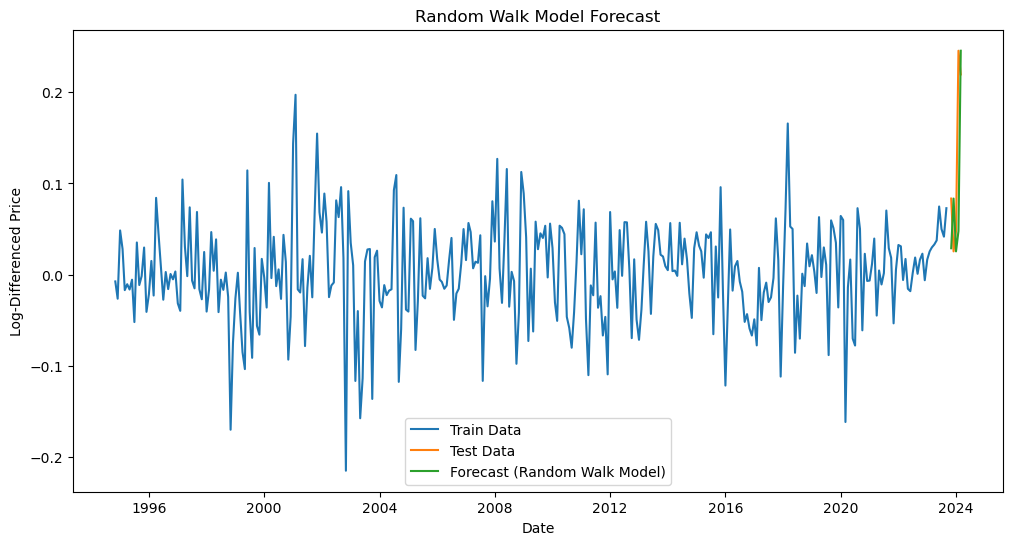

In [18]:
# Random walk model
forecast_rw = test_data.shift(1)

test_data_rw = test_data[1:]
forecast_rw = forecast_rw[1:]

# Evaluation metrics
mae_rw = mean_absolute_error(test_data_rw, forecast_rw)
mse_rw = mean_squared_error(test_data_rw, forecast_rw)
rmse_rw = np.sqrt(mse_rw)

print("Random Walk Model Metrics:")
print("MAE:", mae_rw)
print("MSE:", mse_rw)
print("RMSE:", rmse_rw)

# Plot graph
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data_rw, label='Test Data')
plt.plot(test_data_rw.index, forecast_rw, label='Forecast (Random Walk Model)')
plt.title('Random Walk Model Forecast')
plt.xlabel('Date')
plt.ylabel('Log-Differenced Price')
plt.legend()
plt.show()


Naive Method Metrics:
MAE: 0.07177605315738518
MSE: 0.009343866475599332
RMSE: 0.09666367712641255


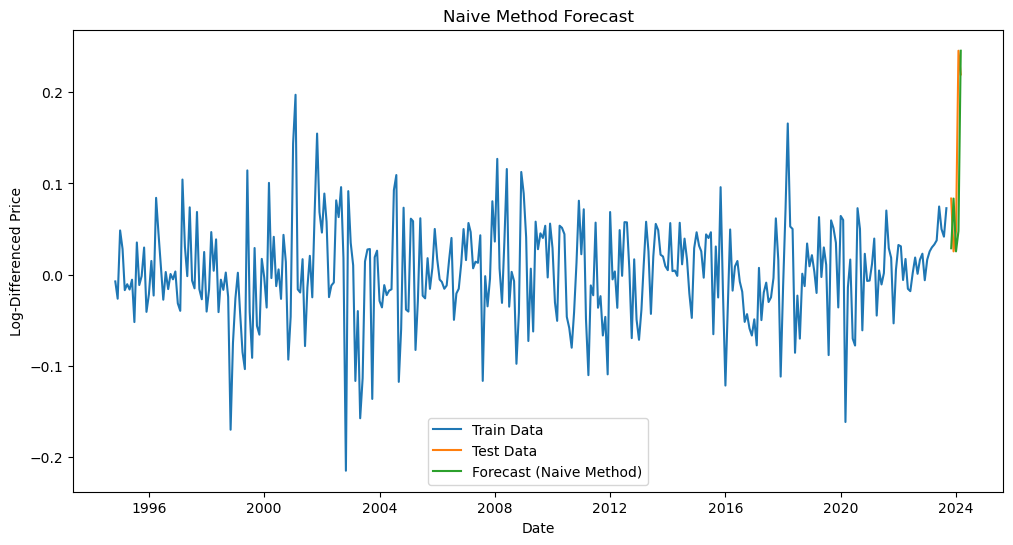

In [19]:
# Naive method
forecast_naive = test_data.shift(1)

# Drop the first value of test_data as it's NaN after shifting
test_data_naive = test_data[1:]
forecast_naive = forecast_naive[1:]

# Evaluation metrics
mae_naive = mean_absolute_error(test_data_naive, forecast_naive)
mse_naive = mean_squared_error(test_data_naive, forecast_naive)
rmse_naive = np.sqrt(mse_naive)

print("Naive Method Metrics:")
print("MAE:", mae_naive)
print("MSE:", mse_naive)
print("RMSE:", rmse_naive)

# Plot graph
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data_naive, label='Test Data')
plt.plot(test_data_naive.index, forecast_naive, label='Forecast (Naive Method)')
plt.title('Naive Method Forecast')
plt.xlabel('Date')
plt.ylabel('Log-Differenced Price')
plt.legend()
plt.show()


Weighted Moving Average (WMA) Model Metrics:
MAE: 0.07563753085454226
MSE: 0.01225514095364154
RMSE: 0.11070294013097186


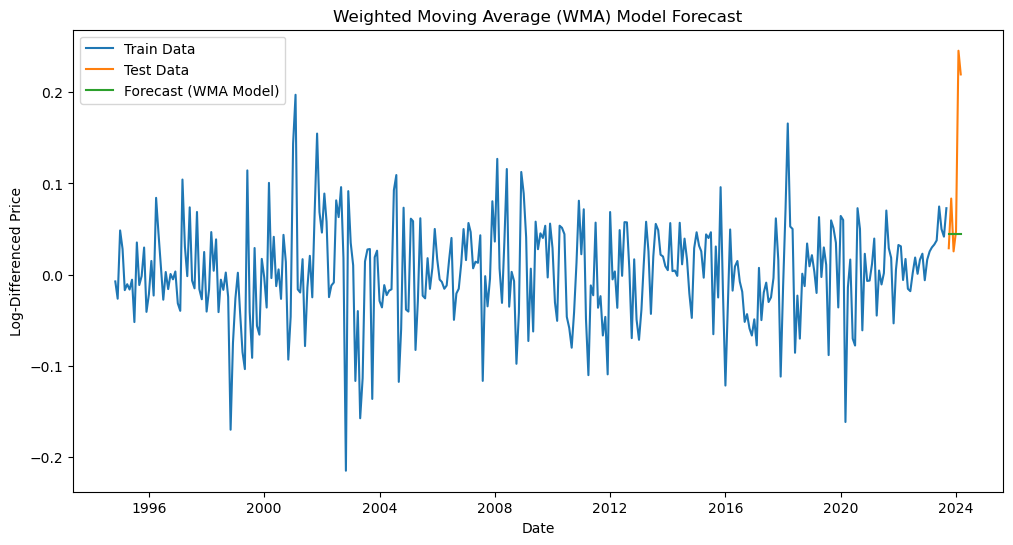

In [20]:
# Weighted Moving Average (WMA) Model
def weighted_moving_average(train_data, test_data, window):
    weights = np.arange(1, window + 1)
    weights = weights / weights.sum()
    forecast_wma = test_data.copy()
    for i in range(len(test_data)):
        forecast_wma.iloc[i] = (train_data.iloc[-window:] * weights).sum()
    return forecast_wma

window = 12  # Choose the window size for WMA
forecast_wma = weighted_moving_average(train_data, test_data, window)

# Evaluation metrics
mae_wma = mean_absolute_error(test_data, forecast_wma)
mse_wma = mean_squared_error(test_data, forecast_wma)
rmse_wma = np.sqrt(mse_wma)

print("Weighted Moving Average (WMA) Model Metrics:")
print("MAE:", mae_wma)
print("MSE:", mse_wma)
print("RMSE:", rmse_wma)

# Plot graph
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast_wma, label='Forecast (WMA Model)')
plt.title('Weighted Moving Average (WMA) Model Forecast')
plt.xlabel('Date')
plt.ylabel('Log-Differenced Price')
plt.legend()
plt.show()


Weighted Moving Average (WMA) Model Metrics:
MAE: 0.0744704619142933
MSE: 0.011287262575627075
RMSE: 0.10624152943000714


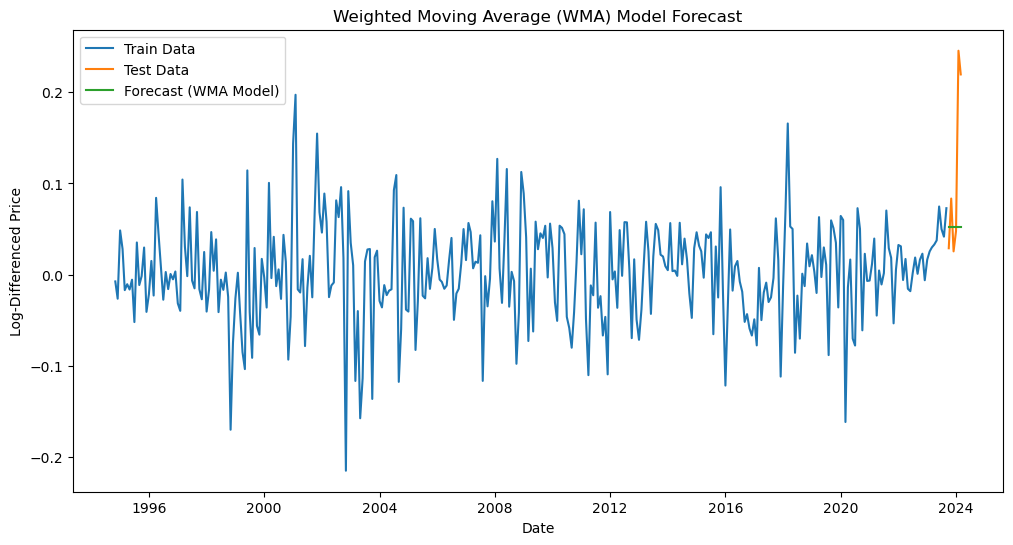

In [21]:
# Weighted Moving Average (WMA) Model
def weighted_moving_average(train_data, test_data, window):
    weights = np.arange(1, window + 1)
    weights = weights / weights.sum()
    forecast_wma = test_data.copy()
    for i in range(len(test_data)):
        forecast_wma.iloc[i] = (train_data.iloc[-window:] * weights).sum()
    return forecast_wma

window = 8  # window size
forecast_wma = weighted_moving_average(train_data, test_data, window)

# Evaluation metrics
mae_wma = mean_absolute_error(test_data, forecast_wma)
mse_wma = mean_squared_error(test_data, forecast_wma)
rmse_wma = np.sqrt(mse_wma)

print("Weighted Moving Average (WMA) Model Metrics:")
print("MAE:", mae_wma)
print("MSE:", mse_wma)
print("RMSE:", rmse_wma)

# Plot graph
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast_wma, label='Forecast (WMA Model)')
plt.title('Weighted Moving Average (WMA) Model Forecast')
plt.xlabel('Date')
plt.ylabel('Log-Differenced Price')
plt.legend()
plt.show()


# SIMPLE EXP MODELING

Simple Exponential Smoothing (SES) Model Metrics:
MAE: 0.10417370007998482
MSE: 0.018978370831367917
RMSE: 0.13776200793893764


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


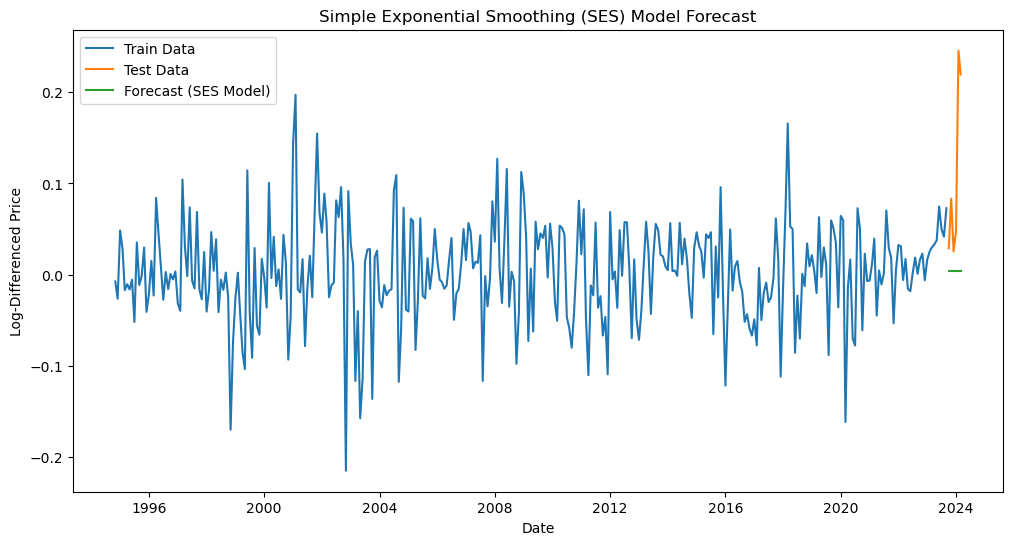

In [22]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Apply Simple Exponential Smoothing (SES)
model_ses = SimpleExpSmoothing(train_data)
model_ses_fit = model_ses.fit()
forecast_ses = model_ses_fit.forecast(len(test_data))

# Evaluation metrics
mae_ses = mean_absolute_error(test_data, forecast_ses)
mse_ses = mean_squared_error(test_data, forecast_ses)
rmse_ses = np.sqrt(mse_ses)

print("Simple Exponential Smoothing (SES) Model Metrics:")
print("MAE:", mae_ses)
print("MSE:", mse_ses)
print("RMSE:", rmse_ses)

# Plot grah
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast_ses, label='Forecast (SES Model)')
plt.title('Simple Exponential Smoothing (SES) Model Forecast')
plt.xlabel('Date')
plt.ylabel('Log-Differenced Price')
plt.legend()
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Double Exponential Smoothing (DES) or Holt's Method Model Metrics:
MAE: 0.10178916473279048
MSE: 0.018481394156957185
RMSE: 0.13594629144245599


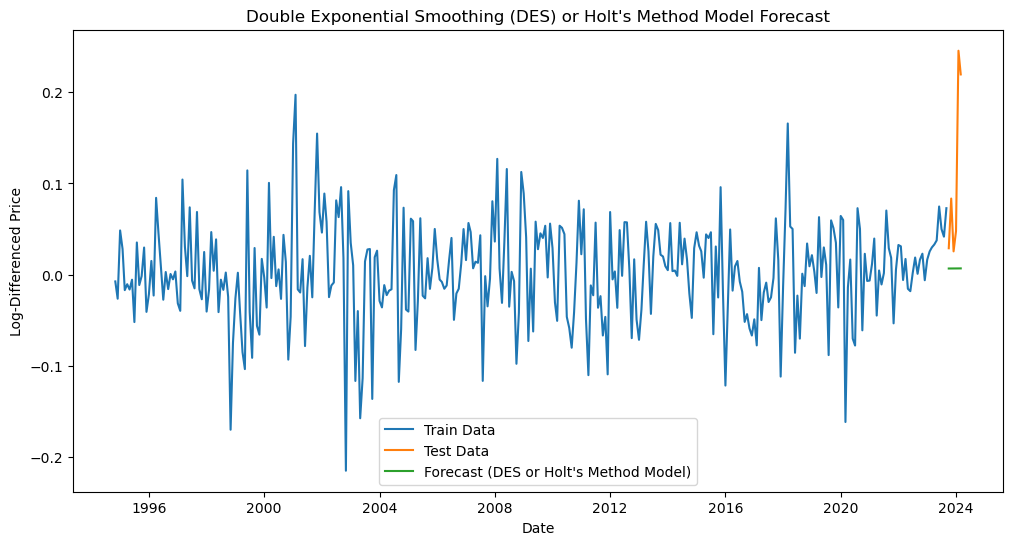

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Double Exponential Smoothing
model_des = ExponentialSmoothing(train_data, trend='add')
model_des_fit = model_des.fit()
forecast_des = model_des_fit.forecast(len(test_data))

# Evaluation metrics
mae_des = mean_absolute_error(test_data, forecast_des)
mse_des = mean_squared_error(test_data, forecast_des)
rmse_des = np.sqrt(mse_des)

print("Double Exponential Smoothing (DES) or Holt's Method Model Metrics:")
print("MAE:", mae_des)
print("MSE:", mse_des)
print("RMSE:", rmse_des)

# Plot graph
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast_des, label="Forecast (DES or Holt's Method Model)")
plt.title("Double Exponential Smoothing (DES) or Holt's Method Model Forecast")
plt.xlabel('Date')
plt.ylabel('Log-Differenced Price')
plt.legend()
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Triple Exponential Smoothing (TES) or Holt-Winters Method Model Metrics:
MAE: 0.10163527291344854
MSE: 0.017101678885145386
RMSE: 0.13077338752645887


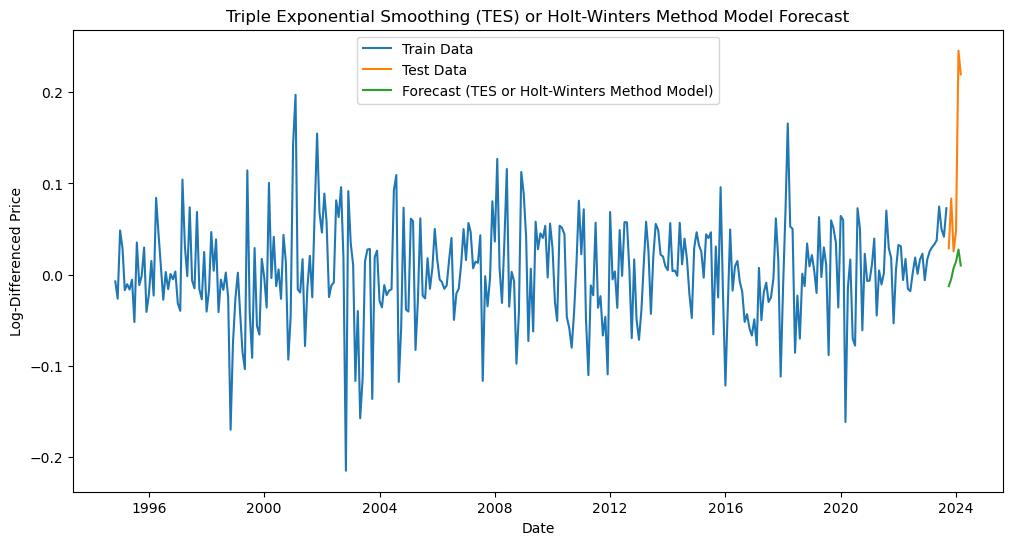

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Applying Triple Exponential Smoothing 
model_tes = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_tes_fit = model_tes.fit()
forecast_tes = model_tes_fit.forecast(len(test_data))

# Evaluation metrics
mae_tes = mean_absolute_error(test_data, forecast_tes)
mse_tes = mean_squared_error(test_data, forecast_tes)
rmse_tes = np.sqrt(mse_tes)

print("Triple Exponential Smoothing (TES) or Holt-Winters Method Model Metrics:")
print("MAE:", mae_tes)
print("MSE:", mse_tes)
print("RMSE:", rmse_tes)

# Plot graph
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast_tes, label="Forecast (TES or Holt-Winters Method Model)")
plt.title("Triple Exponential Smoothing (TES) or Holt-Winters Method Model Forecast")
plt.xlabel('Date')
plt.ylabel('Log-Differenced Price')
plt.legend()
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

Best Parameters: (0.2, 0.3, 0.1)
Best MAE: 0.06328762857132497
MAE on Test Data with Best Parameters: 0.06328762857132497
MSE on Test Data with Best Parameters: 0.006261744656590677
RMSE on Test Data with Best Parameters: 0.07913118637168709


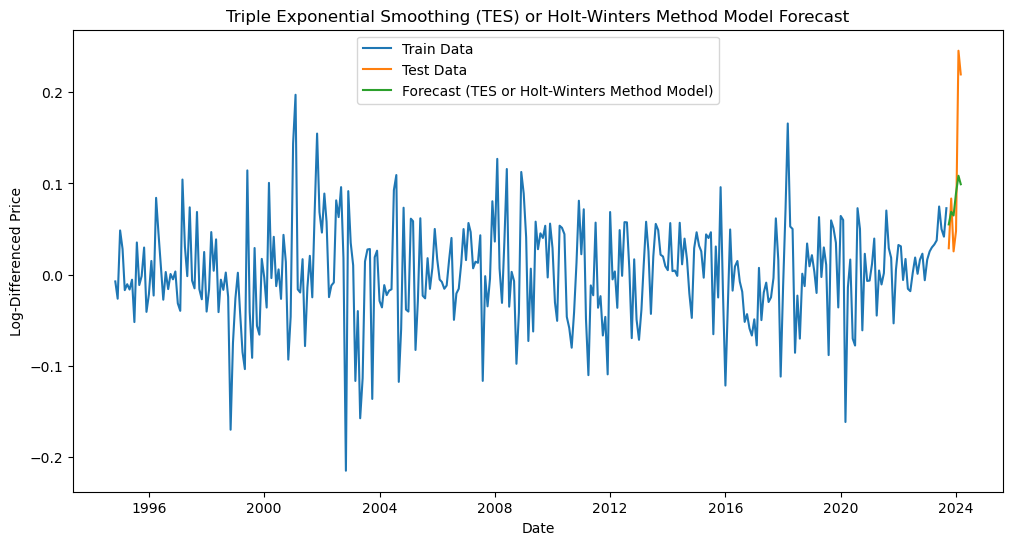

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
import numpy as np

def compute_mae(alpha, beta, gamma, train_data, test_data):
    model_tes = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
    model_tes_fit = model_tes.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
    forecast_tes = model_tes_fit.forecast(len(test_data))
    return mean_absolute_error(test_data, forecast_tes)

# Define the grid of parameter values
alpha_values = [0.1, 0.2, 0.3]
beta_values = [0.1, 0.2, 0.3]
gamma_values = [0.1, 0.2, 0.3]

best_mae = float('inf')
best_params = None

# Perform grid search
for alpha in alpha_values:
    for beta in beta_values:
        for gamma in gamma_values:
            mae = compute_mae(alpha, beta, gamma, train_data, test_data)
            if mae < best_mae:
                best_mae = mae
                best_params = (alpha, beta, gamma)

alpha_best, beta_best, gamma_best = best_params
model_tes_best = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_tes_fit_best = model_tes_best.fit(smoothing_level=alpha_best, smoothing_trend=beta_best, smoothing_seasonal=gamma_best)
forecast_tes_best = model_tes_fit_best.forecast(len(test_data))

mae_best = mean_absolute_error(test_data, forecast_tes_best)
mse_best = mean_squared_error(test_data, forecast_tes_best)
rmse_best = np.sqrt(mse_best)

print("Best Parameters:", best_params)
print("Best MAE:", best_mae)
print("MAE on Test Data with Best Parameters:", mae_best)
print("MSE on Test Data with Best Parameters:", mse_best)
print("RMSE on Test Data with Best Parameters:", rmse_best)

# Plot graph
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast_tes_best, label="Forecast (TES or Holt-Winters Method Model)")
plt.title("Triple Exponential Smoothing (TES) or Holt-Winters Method Model Forecast")
plt.xlabel('Date')
plt.ylabel('Log-Differenced Price')
plt.legend()
plt.show()


# ARIMA

In [26]:
# Perform log differencing
data_log_diff = np.log(data['Price']).diff().dropna()

# Check stationarity using the Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data_log_diff)
print("Dickey-Fuller Test Statistic (Log-Differenced Data):", adf_result[0])
print("p-value (Log-Differenced Data):", adf_result[1])
if adf_result[1] < 0.05:
    print("Reject the null hypothesis: The log-differenced data is stationary")
else:
    print("Fail to reject the null hypothesis: The log-differenced data is non-stationary")


Dickey-Fuller Test Statistic (Log-Differenced Data): -4.470199156297323
p-value (Log-Differenced Data): 0.00022251308424014644
Reject the null hypothesis: The log-differenced data is stationary


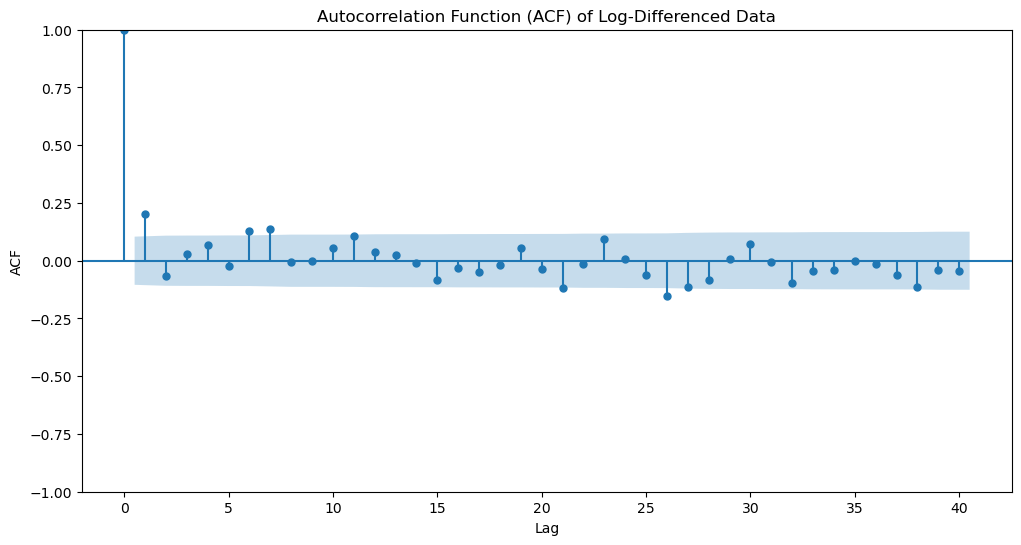

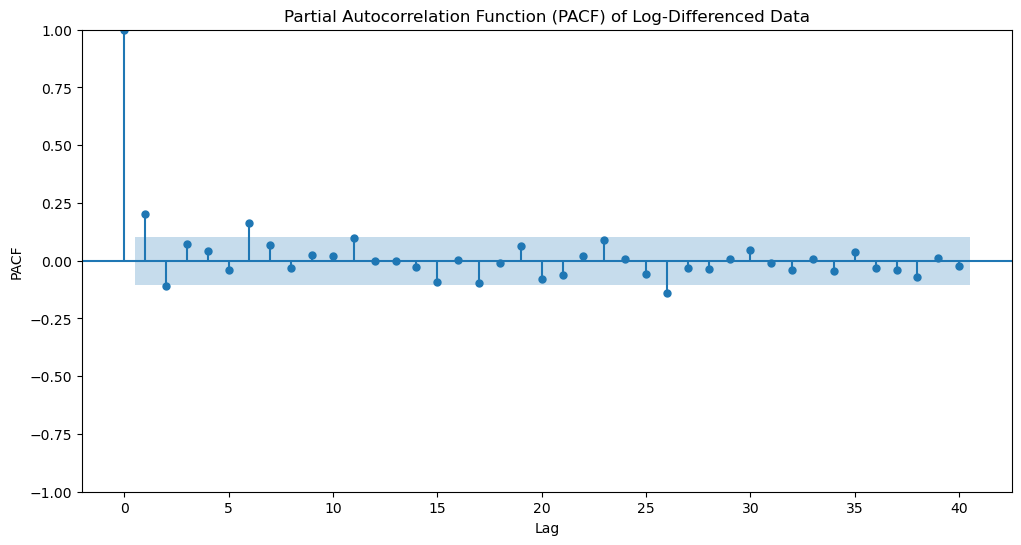

In [27]:
# Plot ACF and PACF of log-differenced data
plt.figure(figsize=(12, 6))
plot_acf(data_log_diff, lags=40, ax=plt.gca(), title='Autocorrelation Function (ACF) of Log-Differenced Data')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data_log_diff, lags=40, ax=plt.gca(), title='Partial Autocorrelation Function (PACF) of Log-Differenced Data')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE) on Test Data: 0.09476885203278591
Mean Squared Error (MSE) on Test Data: 0.01693234429734509
Root Mean Squared Error (RMSE) on Test Data: 0.1301243416788154


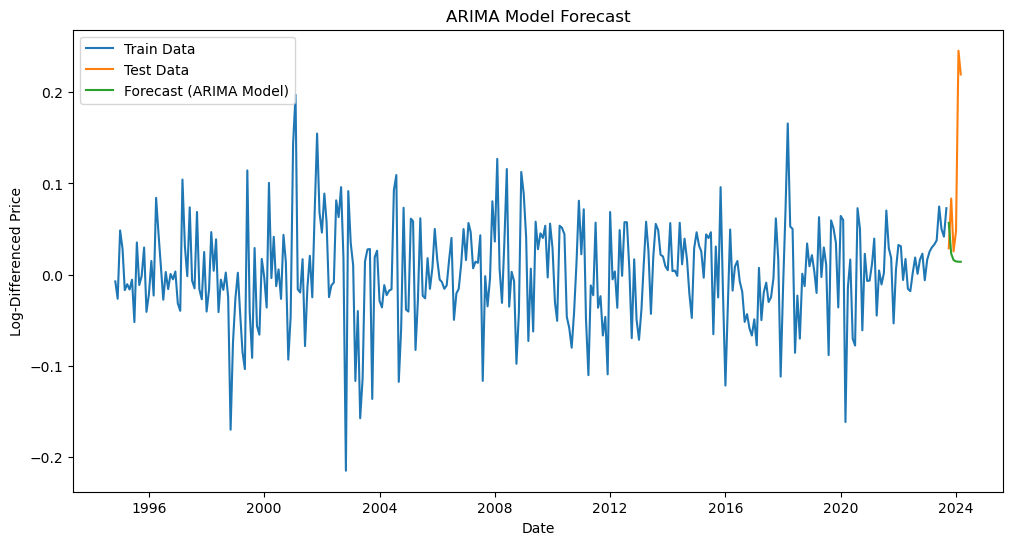

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# Define the ARIMA model parameters
p = 1  
d = 1  
q = 1  

# Create ARIMA model
arima_model = ARIMA(data_log_diff, order=(p, d, q))

# Fit ARIMA model
arima_model_fit = arima_model.fit()

# Forecast
forecast = arima_model_fit.forecast(steps=len(test_data))

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, forecast)
print("Mean Absolute Error (MAE) on Test Data:", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data, forecast)
print("Mean Squared Error (MSE) on Test Data:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) on Test Data:", rmse)


# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast, label="Forecast (ARIMA Model)")
plt.title("ARIMA Model Forecast")
plt.xlabel('Date')
plt.ylabel('Log-Differenced Price')
plt.legend()
plt.show()


In [29]:
# Summary of ARIMA model
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  353
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 514.839
Date:                Mon, 06 May 2024   AIC                          -1023.679
Time:                        19:45:13   BIC                          -1012.088
Sample:                    11-01-1994   HQIC                         -1019.066
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2077      0.044      4.719      0.000       0.121       0.294
ma.L1         -0.9878      0.016    -61.226      0.000      -1.019      -0.956
sigma2         0.0031      0.000     18.398      0.0

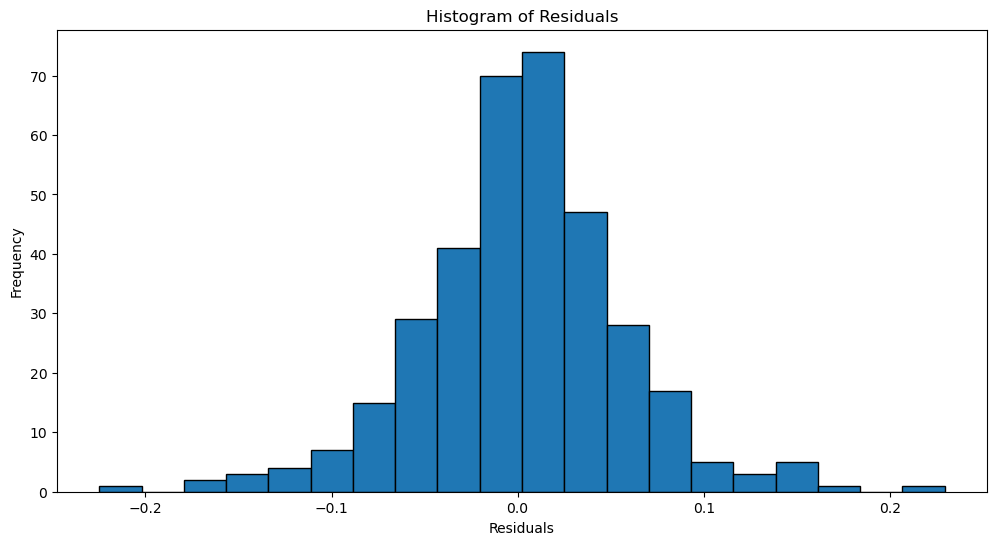

In [30]:
# Plot residuals of the histogram
plt.figure(figsize=(12, 6))
plt.hist(arima_model_fit.resid, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA Model Metrics:
MAE: 0.0777941996401888
MSE: 0.01150799045180049
RMSE: 0.10727530215198879


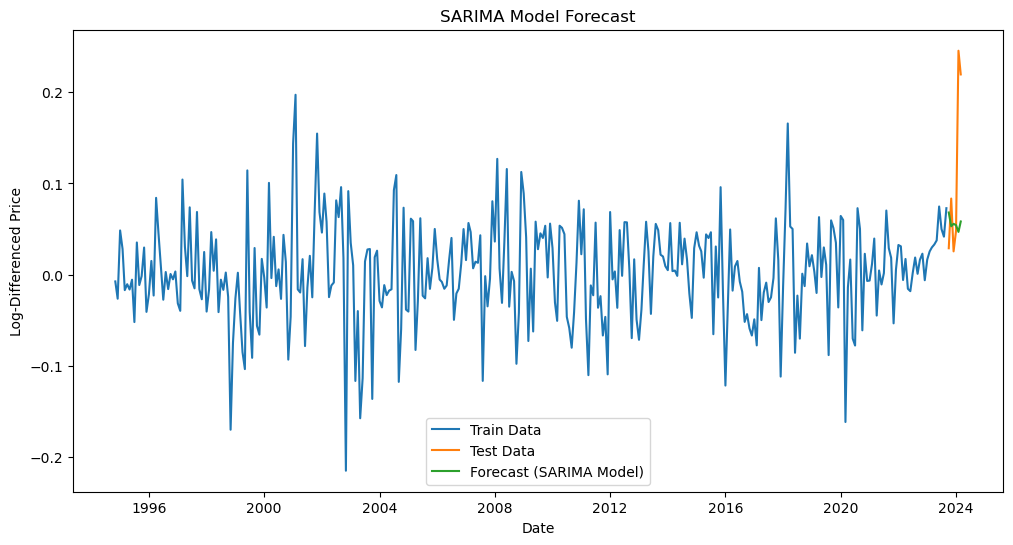

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Define SARIMA model parameters
p = 1  
d = 1  
q = 1  
P = 1  
D = 1  
Q = 1  
s = 12 

# Create SARIMA model
sarima_model = SARIMAX(data_log_diff, order=(p, d, q), seasonal_order=(P, D, Q, s))

sarima_model_fit = sarima_model.fit()

forecast = sarima_model_fit.forecast(steps=len(test_data))

mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = sqrt(mse)

print("SARIMA Model Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast, label="Forecast (SARIMA Model)")
plt.title("SARIMA Model Forecast")
plt.xlabel('Date')
plt.ylabel('Log-Differenced Price')
plt.legend()
plt.show()


In [32]:
sarima_summary = sarima_model_fit.summary()
print(sarima_summary)

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  353
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 476.911
Date:                            Mon, 06 May 2024   AIC                           -943.823
Time:                                    19:45:18   BIC                           -924.678
Sample:                                11-01-1994   HQIC                          -936.194
                                     - 03-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1611      0.054      2.973      0.003       0.055       0.267
ma.L1         -0.9451      0.026   

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Define SARIMA model parameters
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 24


# Create SARIMA model
sarima_model = SARIMAX(data_log_diff, order=(p, d, q), seasonal_order=(P, D, Q, s))

# Fit SARIMA model
sarima_model_fit = sarima_model.fit()

# Get model summary
print("SARIMA Model Summary:")
print(sarima_model_fit.summary())

# Forecast
forecast = sarima_model_fit.forecast(steps=len(test_data))

# Evaluation metrics
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = sqrt(mse)

print("\nSARIMA Model Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  353
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                 449.495
Date:                            Mon, 06 May 2024   AIC                           -888.990
Time:                                    19:45:30   BIC                           -870.025
Sample:                                11-01-1994   HQIC                          -881.423
                                     - 03-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1579      0.059      2.676      0.007       0.042       0.274
ma.L1        

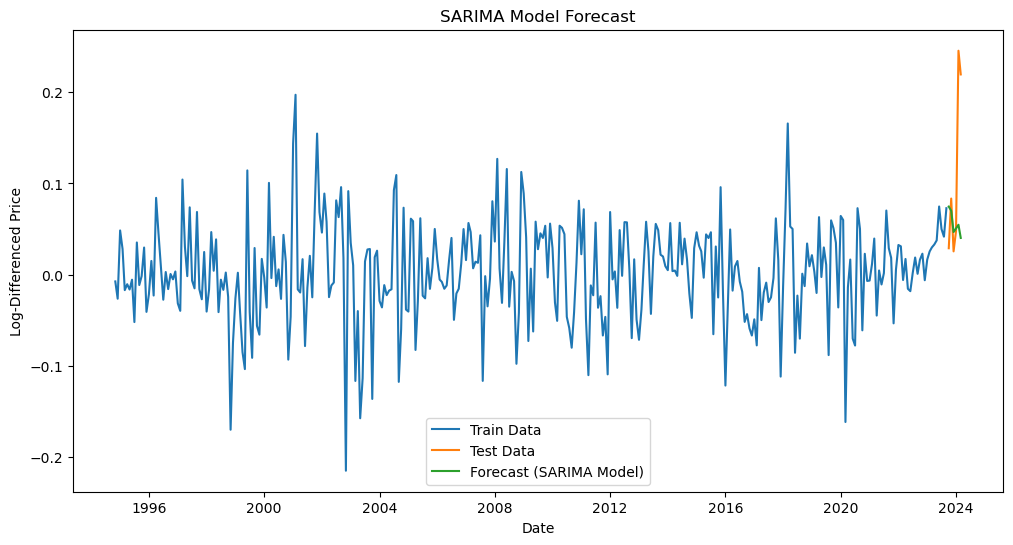

In [34]:
# Plot graph
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast, label="Forecast (SARIMA Model)")
plt.title("SARIMA Model Forecast")
plt.xlabel('Date')
plt.ylabel('Log-Differenced Price')
plt.legend()
plt.show()
